### Построение матрицы и вектора

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для построения матрицы и вектора
def init_system(n = 100, a = 10):
    A = np.zeros((n, n))
    b = np.arange(1, n + 1)
    
    for i in range(n):
        A[i, i] = a
        for j in range(max(0, i-4), min(n, i+5)):
            if j != i:
                A[i, j] = 1
                
    return A, b

### Реализация метода Ричардсона

In [2]:
def richardson_method(A, b, tau, max_iter = 100):
    x = np.zeros_like(b, dtype=float)
    residuals = []
    b_norm = np.linalg.norm(b)
    
    for k in range(max_iter):
        r = A @ x - b
        x = x - tau * r
        residuals.append(np.linalg.norm(r) / b_norm)
    
    return x, residuals

### Визуализация графиков

In [3]:
def visualize_taus(A, b, selected_taus, max_iter):
    plt.figure(figsize=(12, 8))
    
    for tau in selected_taus:
        residuals = richardson_method(A, b, tau, max_iter)
        plt.semilogy(range(1, max_iter + 1), residuals[1], 
                     marker='o', linewidth=2, markersize=6,
                     label=f'$\\tau = {tau:.3f}$')
        
    plt.xlabel('Номер итерации', fontsize=12)
    plt.ylabel('Норма невязки $||r||_2$', fontsize=12)
    plt.title('Сходимость метода Ричардсона', fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# --- Проверка оптимального tau ---
def verify_tau(A, b, tau_optimal, eps=1e-5, max_iter=100):
    x = np.zeros_like(b)
    residuals = []
    converged_iter = -1
    
    for k in range(max_iter):
        r = A @ x - b
        x = x - tau_optimal * r
        residual_norm = np.linalg.norm(r)
        residuals.append(residual_norm)
        
        if residual_norm < eps:
            converged_iter = k + 1
            print(f'Метод сходится при tau = {tau_optimal} за {converged_iter} итераций.')
            break
    
    if converged_iter == -1:
        print(f'Метод не сходится при tau = {tau_optimal} за {max_iter} итераций.')
    
    return residuals

# --- График для одного tau ---
def plot_convergence(residuals, tau_optimal):
    plt.figure(figsize=(10, 6))
    iterations = range(1, len(residuals) + 1)
    plt.semilogy(iterations, residuals, 'bo-', linewidth=2, markersize=6, 
                 label=f'$\\tau = {tau_optimal}$')
    
    plt.axhline(y=1e-5, color='red', linestyle='--', 
                label='$\\varepsilon$ = 10^{-5}', alpha=0.7)
    plt.xlabel('Номер итерации', fontsize=12)
    plt.ylabel('Норма невязки $||r||_2$', fontsize=12)
    plt.title(f'Сходимость метода Ричардсона с оптимальным tau', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

### Оптимальное значение параметра $\tau$

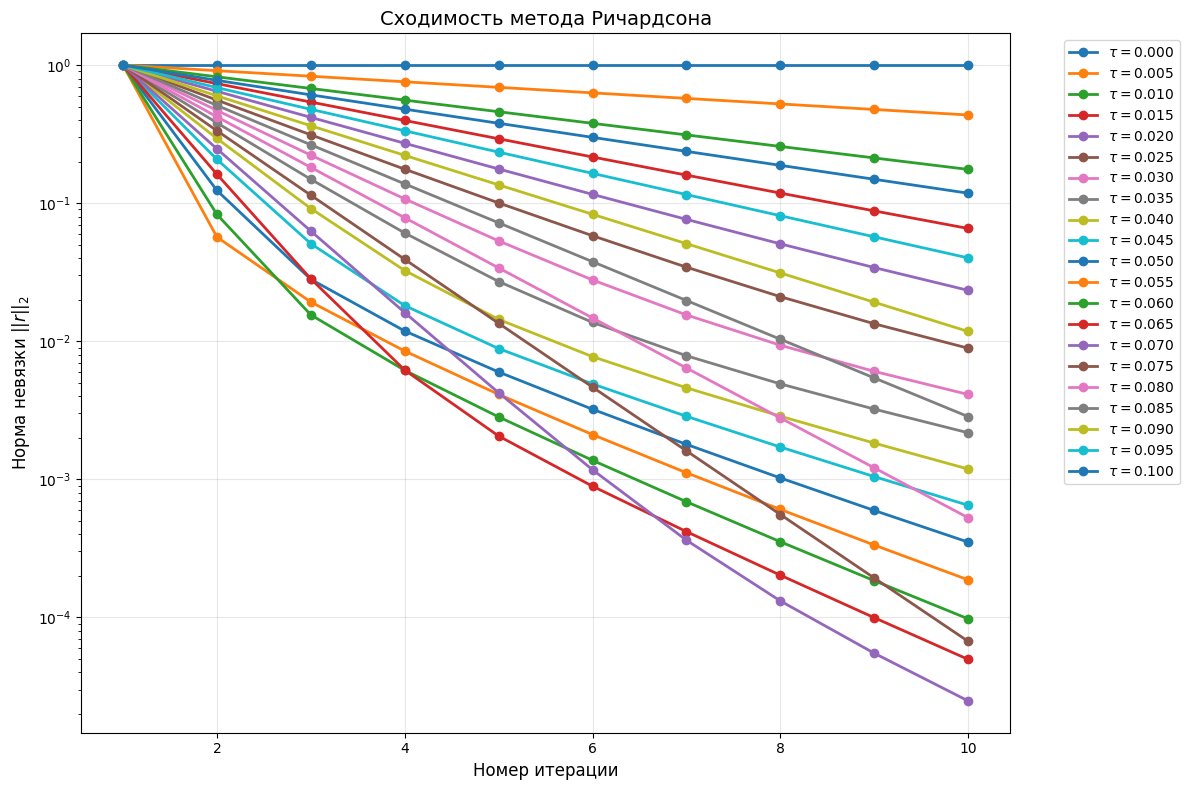

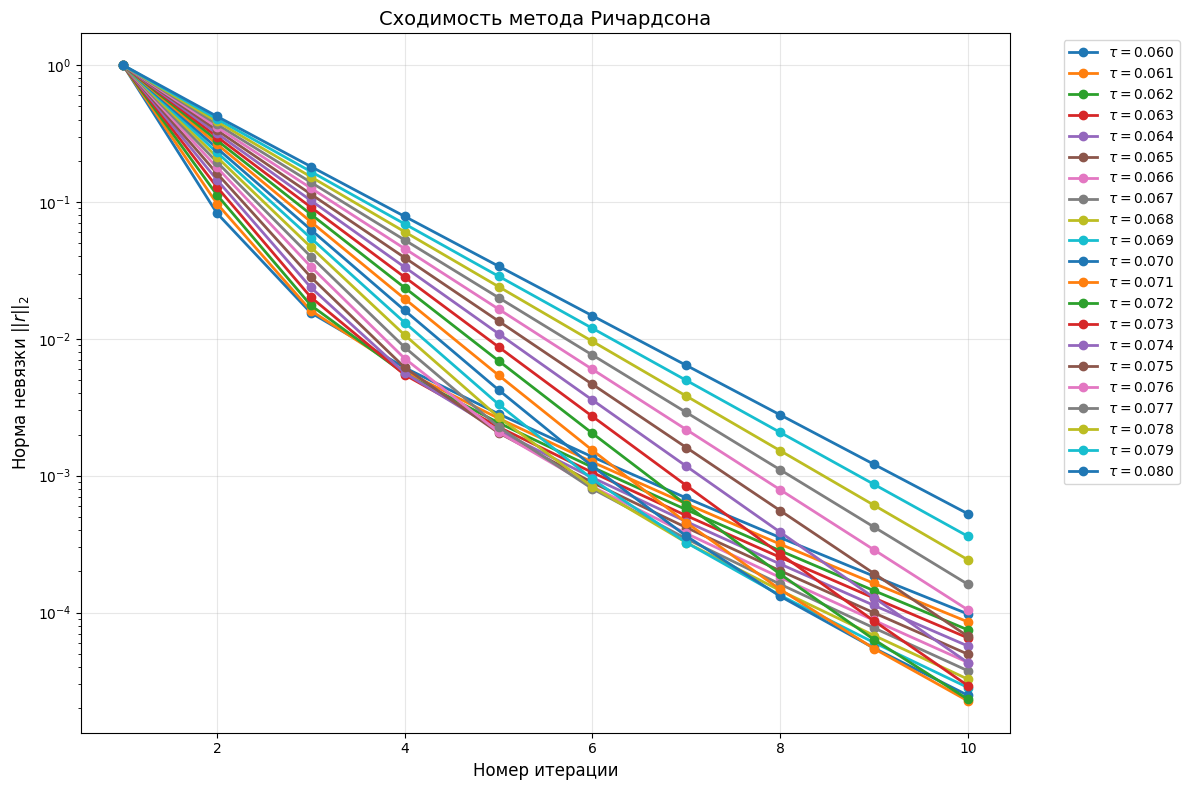

Метод сходится при tau = 0.072 за 20 итераций.


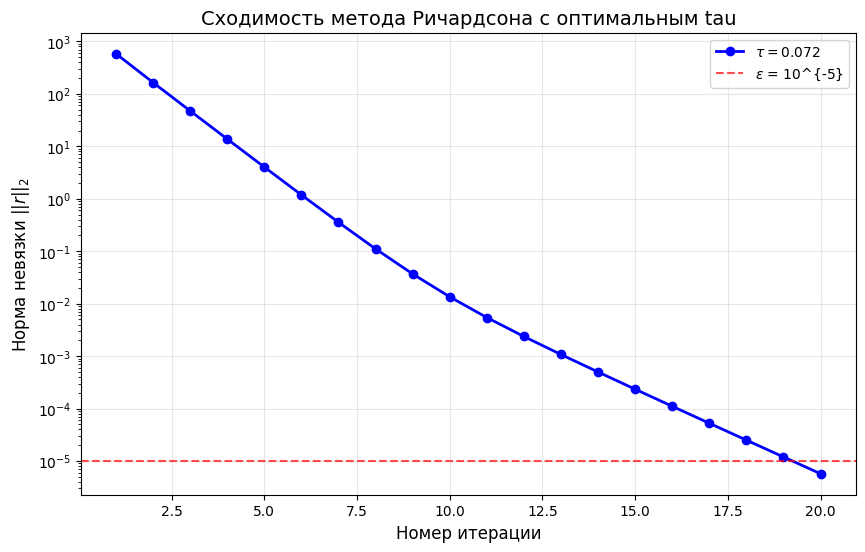

In [4]:
A, b = init_system()

# Анализ tau
taus = np.linspace(0.00, 0.1, 21)
visualize_taus(A, b, taus, max_iter=10)

# Анализ tau с наибольшей сходимостью
selected_taus = np.linspace(0.06, 0.08, 21)
visualize_taus(A, b, selected_taus, max_iter=10)

# Проверка оптимального tau
tau_optimal = 0.072
residuals = verify_tau(A, b, tau_optimal)
plot_convergence(residuals, tau_optimal)

Получаем $\tau_{opt}$ = 0.072

### Оценка максимального по модулю собственного значения и числа обусловенности матрицы системы.

In [5]:
n = 100
A, _ = init_system(n, 10)

# Степенной метод для нахождения максимального численного значения
def power_method(A, eps=1e-5, max_iter=1000):
    y = np.random.rand(n)
    y /= np.linalg.norm(y)

    lambda_ = 0.0
    for _ in range(max_iter):
        y_new = A @ y
        lambda_new = y_new.T @ y
        y_new /= np.linalg.norm(y_new)
        if abs(lambda_new - lambda_) < eps: break
        lambda_ = lambda_new
        y = y_new

    return lambda_

def translate_matrix(A, lambda_):
    return lambda_ * np.eye(n) - A

lambda_max = power_method(A)
mu_max = power_method(translate_matrix(A, lambda_max))
lambda_min = lambda_max - mu_max

kappa = lambda_max / lambda_min

print(f"Наибольшее собственное значение λ_max = {lambda_max:.6f}")
print(f"Наименьшее собственное значение λ_min = {lambda_min:.6f}")
print(f"Число обусловленности μ(A) = {kappa:.6f}")


Наибольшее собственное значение λ_max = 17.971369
Наименьшее собственное значение λ_min = 6.980758
Число обусловленности μ(A) = 2.574415


### Сравнение экспериментального и теоритического $\tau_{opt}$
Экспериментально $\tau_{exp,opt} = 0.072$. 
Однако так как матрица положительноопределнная и симметричная, то $\tau_{teor,opt} = \frac{2}{\lambda_{max} + \lambda_{min}} = 0.08$. 
Используем оба этих значения и сравним результаты.

Tau = 0.072 | Относительная погрешность после 20 итераций: 1.16e-08
Tau = 0.080 | Относительная погрешность после 20 итераций: 5.58e-08


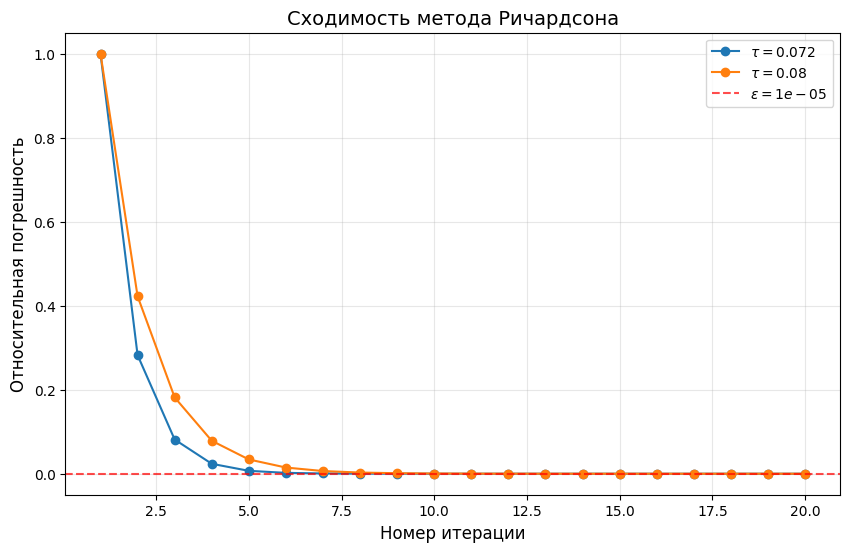

In [9]:
A, b = init_system()
x_true = np.linalg.solve(A, b)

taus = [0.072, 0.08]
max_iter = 20
eps = 1e-5

solutions = []
residuals_list = []
relative_errors = []

for tau in taus:
    x_sol, residuals = richardson_method(A, b, tau, max_iter)
    solutions.append(x_sol)
    residuals_list.append(residuals)
    
    rel_error = np.linalg.norm(x_sol - x_true) / np.linalg.norm(x_true)
    relative_errors.append(rel_error)

    print(f'Tau = {tau:.3f} | Относительная погрешность после {max_iter:2d} итераций: {rel_error:.2e}')


plt.figure(figsize=(10, 6))
for tau, residuals in zip(taus, residuals_list):
    plt.plot(range(1, max_iter+1), residuals, marker='o', label=f'$\\tau = {tau}$')

plt.axhline(eps, color='red', linestyle='--', label=f'$\\varepsilon = {eps}$', alpha=0.7)
plt.xlabel('Номер итерации', fontsize=12)
plt.ylabel('Относительная погрешность', fontsize=12)
plt.title('Сходимость метода Ричардсона', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()
